In [ ]:
#from google.colab import drive 
#drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy import stats
import os

In [2]:
cd d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [19]:
x = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
x = x.set_index('dateTime')

x_temp = x.iloc[:,0]
x_sal = x.iloc[:,1]
x_ftu = x.iloc[:,2]
x_fluors = x.iloc[:,3]
x_02 = x.iloc[:,4]
x_kd = x.iloc[:,5]
x_par_0 = x.iloc[:,6]
x_par_1 = x.iloc[:,7]
x_par_2 = x.iloc[:,8]

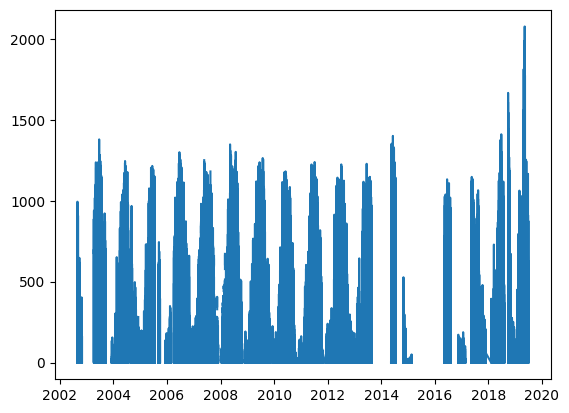

In [7]:
#plot original to see if it can be interpolated (simply)
plt.plot(x_par_1)
plt.show()

In [9]:
#filling in a range of missing values
x_temp_2 = x_temp.interpolate(method="linear", limit=550, limit_direction='both',limit_area='inside') #5.7 days
x_sal_2 = x_sal.interpolate(method="linear", limit=3800, limit_direction='both',limit_area='inside') #probably too big of a gap -39 days
x_ftu_2 = x_ftu.interpolate(method="linear", limit=1500, limit_direction='both',limit_area='inside') #15 days
x_kd_2 = x_kd.interpolate(method="linear", limit=2000, limit_direction='both',limit_area='inside') #20 days
x_fluors_2 = x_fluors.interpolate(method="linear", limit=2000, limit_direction='both',limit_area='inside') #20 days
x_02_2 = x_02.interpolate(method="linear", limit=9000, limit_direction='both', limit_area='inside') #100 days - but is ok because of the trend


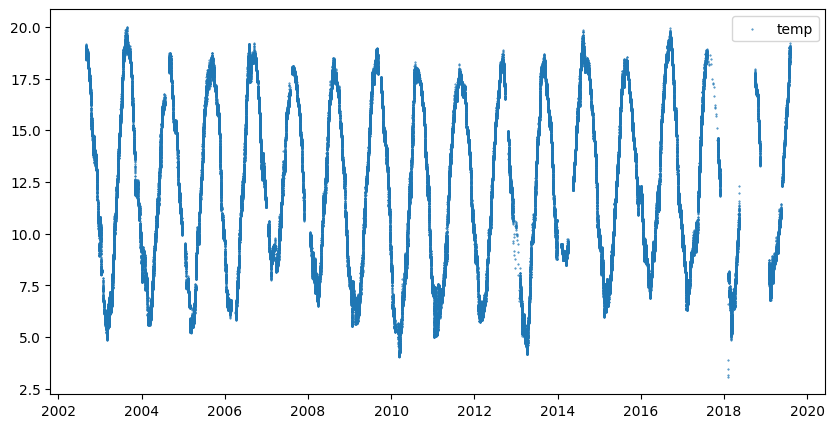

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x.index, x_temp, s = 0.2, label = 'temp')
#ax.scatter(x.index, x_temp_2, s = 0.2, label = 'temp_2')

ax.legend()
plt.show()

In [113]:
#removing nan  values to do machine learning later
x_temp_2.fillna('')
x_sal_2.fillna("")
x_ftu_2.fillna('')
x_kd_2.fillna('')
x_fluors_2.fillna('')
x_02_2.fillna('')

dateTime
2002-08-28 13:15:00     
2002-08-28 13:30:00     
2002-08-28 13:45:00     
2002-08-28 14:00:00     
2002-08-28 14:15:00     
                      ..
2019-12-07 13:30:00     
2019-12-07 14:00:00     
2019-12-07 14:30:00     
2019-12-07 15:00:00     
2019-12-07 15:30:00     
Name: o2, Length: 324479, dtype: object

In [114]:
#replacing x with interpolated columns
x.iloc[:,0]=x_temp_2
x.iloc[:,1]=x_sal_2
x.iloc[:,2]=x_ftu_2
x.iloc[:,3]=x_fluors_2
x.iloc[:,4]=x_02_2
x.iloc[:,5]=x_kd_2

In [116]:
cd "/content/gdrive/My Drive"

/content/gdrive/My Drive


In [117]:
x.to_csv('interp_data.csv', sep = ',', na_rep='', index=False)
